# Run within and across task head classification again but here use in and outpoke behavioiural timestamps in order to determine timing of events


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import scipy.stats as stt
from sklearn.svm import SVC
from sklearn.model_selection import LeavePOut


seaborn.set(style='ticks',font_scale=1.5)


/Users/yves/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# From pycontrol

In [2]:
from mecll.load import load_preprocessed_data
from mecll.classify_movement_direction import (get_svm_fit_across_task, 
                                               get_svm_fit_within_task,
                                               get_unique_transitions
                                              )

In [3]:
session_dataset = load_preprocessed_data(3,"/Users/Yves/Documents/spike/")

/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)


In [4]:
frm_task = session_dataset.firing_rate_maps[:,:,0]

In [5]:
frm_task.shape

(202, 9, 2)

In [6]:
valid_ix = np.where(~np.isnan(np.sum(frm_task,axis=(0,2))))[0]

In [7]:
valid_ix = np.where(~np.isnan(np.sum(frm_task,axis=(0,2))))[0]
shuffle_svcs = []
for _ in range(100):
    shuffle_svcs.append(np.mean(get_svm_fit_within_task(frm_task,valid_ix,permutation=True)))
true_scv = np.mean(get_svm_fit_within_task(frm_task, valid_ix, permutation=False))

In [8]:
true_scv = np.mean(get_svm_fit_within_task(frm_task, valid_ix, permutation=False))

In [9]:
print(true_scv)
stt.percentileofscore(shuffle_svcs,true_scv)

0.7857142857142857


99.0

# Batch within task

In [35]:
all_real = []
all_permutation = []
for session_index in range(30):
    try:
        session_dataset = load_preprocessed_data(session_index,"/Users/Yves/Documents/spike/")
        overlapping_ports = get_unique_transitions(session_dataset.seq0, session_dataset.seq1)
        frm_task1 = session_dataset.firing_rate_maps[:,:,0]
        frm_task2 = session_dataset.firing_rate_maps[:,:,1]
#         spatial_map = np.mean(session_dataset.firing_rate_maps,axis=(2,3))
#         frm_task1 = frm_task1 - spatial_map[:,:,None]
#         frm_task2 = frm_task2 - spatial_map[:,:,None]

        for frm_task in [frm_task1,frm_task2]:
            valid_ix = np.where(~np.isnan(np.sum(frm_task,axis=(0,2))))[0]
            shuffle_svcs = []
            for _ in range(100):
                shuffle_svcs.append(np.mean(
                                            get_svm_fit_within_task(frm_task,
                                                                    valid_ix,
                                                                    permutation=True,
                                                                    leave_out=2)
                                            )
                                    )
                
            true_scv = np.mean(get_svm_fit_within_task(frm_task,
                                                       valid_ix,
                                                       permutation=False,
                                                       leave_out=2)
                              )
            all_real.append(true_scv)
            all_permutation.append(shuffle_svcs)
    except:
        print("running session: {} failed".format(session_index))

/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice


running session: 1 failed


/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice


running session: 4 failed
running session: 5 failed


/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)


running session: 6 failed


/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)


running session: 7 failed
running session: 8 failed


/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)


running session: 9 failed


/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)


running session: 10 failed
running session: 11 failed


/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice


running session: 22 failed
running session: 23 failed
running session: 24 failed
running session: 25 failed
running session: 26 failed
running session: 27 failed
running session: 28 failed
running session: 29 failed


In [36]:
perm_avg = np.mean(np.array(all_permutation),axis=0)
true_avg = np.mean(all_real)

In [37]:
stt.percentileofscore(perm_avg, true_avg)

100.0

In [38]:
all_real

[0.8819444444444444,
 0.4930555555555556,
 0.42857142857142855,
 0.5972222222222222,
 0.4444444444444444,
 0.7142857142857143,
 0.9861111111111112,
 0.5714285714285714,
 0.6180555555555556,
 0.4880952380952381,
 0.5119047619047619,
 0.38095238095238093,
 0.4375,
 0.5595238095238095,
 0.5119047619047619,
 0.5833333333333334,
 0.6666666666666666,
 0.5833333333333334,
 0.3333333333333333,
 0.4523809523809524,
 0.32142857142857145,
 0.5238095238095238,
 0.5119047619047619,
 0.5952380952380952,
 0.5555555555555556,
 0.4523809523809524,
 0.6180555555555556]

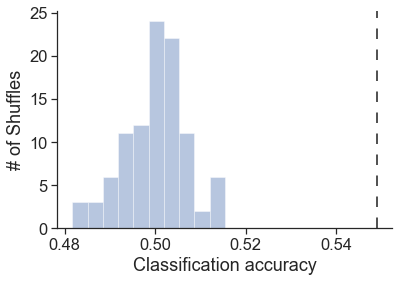

In [39]:
seaborn.distplot(perm_avg,kde=0)
plt.axvline(x=true_avg,color='k',linestyle='--',dashes=(7,7))
plt.xlabel("Classification accuracy")
plt.ylabel("# of Shuffles")
seaborn.despine()

# Across task decoding

In [10]:
valid_ix = np.where(~np.isnan(np.sum(frm_task,axis=(0,2))))[0]

In [18]:
overlapping_ports = get_unique_transitions(session_dataset.seq0, session_dataset.seq1)

In [19]:
frm_task1 = session_dataset.firing_rate_maps[:,:,0]
frm_task2 = session_dataset.firing_rate_maps[:,:,1]

In [21]:
valid_ix = np.where(~np.isnan(np.sum(session_dataset.firing_rate_maps,axis=(0,2,3))))[0]

real_acoss_task_fit = (np.abs(get_svm_fit_across_task(frm_task,frm_task2,
                                                     valid_ix,
                                                     overlapping_ports,
                                                     do_shuffle=False)-.5)
                             +.5)
permutation_fits = [(np.abs(get_svm_fit_across_task(frm_task,frm_task2,
                                            valid_ix,
                                            overlapping_ports,
                                            do_shuffle=True) -.5)
                     +.5)
                    for _ in range(500)]
                          
#mean_perm_fits = [np.mean(i) for i in permutation_fits]

Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accura

Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accuracy=1.00
Train set accura

In [22]:
real_acoss_task_fit

0.8

In [24]:
stt.percentileofscore(permutation_fits,real_acoss_task_fit)

81.3

# Batch across tasks

In [14]:
all_real = []
all_permutation = []
for session_index in range(30):
    try:
        session_dataset = load_preprocessed_data(session_index,"/Users/Yves/Documents/spike/")
        overlapping_ports = get_unique_transitions(session_dataset.seq0, session_dataset.seq1)
        frm_task1 = session_dataset.firing_rate_maps[:,:,0]
        frm_task2 = session_dataset.firing_rate_maps[:,:,1]


        valid_ix = np.where(~np.isnan(np.sum(session_dataset.firing_rate_maps,axis=(0,2,3))))[0]

        real_acoss_task_fit = (np.abs(get_svm_fit_across_task(frm_task,frm_task2,
                                                             valid_ix,
                                                             overlapping_ports,
                                                             do_shuffle=False)-.5)
                                     +.5)
        permutation_fits = [(np.abs(get_svm_fit_across_task(frm_task,frm_task2,
                                                    valid_ix,
                                                    overlapping_ports,
                                                    do_shuffle=True) -.5)
                             +.5)
                            for _ in range(100)]

        all_real.append(real_acoss_task_fit)
        all_permutation.append(permutation_fits)
    except:
        print("running session: {} failed".format(session_index))

running session: 0 failed
running session: 1 failed
running session: 2 failed


/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice


running session: 4 failed
running session: 5 failed
running session: 6 failed
running session: 7 failed
running session: 8 failed


/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice


running session: 9 failed
running session: 10 failed
running session: 11 failed
running session: 12 failed


/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice


running session: 13 failed
running session: 14 failed
running session: 15 failed
running session: 16 failed


/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice


running session: 17 failed
running session: 18 failed
running session: 19 failed
running session: 20 failed
running session: 21 failed
running session: 22 failed
running session: 23 failed
running session: 24 failed
running session: 25 failed
running session: 26 failed
running session: 27 failed
running session: 28 failed
running session: 29 failed


/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)
/Users/yves/Documents/Code/mec_ephys/packages/mecll/src/mecll/retreat_preprocess.py:89: RuntimeWarning: Mean of empty slice
  firing_rate_maps[:,int(port),int(task),dix] = np.nanmean(response_table[table_index],axis=0)


In [15]:
all_real

[0.8]

# Run analysis unbalanced

In [ ]:
perm_accuracy = []
for _ in range(500):
    svm_accuracy = []
    for i in range(8):
        firing_rate_maps,_,data_tuple = load_data(i)
        seq0,seq1,graph_type0,graph_type1 = data_tuple
        spatial_map  = np.nanmean(firing_rate_maps,axis=(2,3))
        #mds_frm = firing_rate_maps - spatial_map[:,:,None,None]


        seq0_transitions, seq1_transitions = get_train_test_transitions_unbalanced(seq0, seq1,
                                                                                   graph_type0, graph_type1)
        task0_frm = firing_rate_maps[:,:,0]
        task1_frm = firing_rate_maps[:,:,1]

        svm = SVC(kernel='linear')
        X_train, y_train = get_features_and_targets(task0_frm,seq=seq0)
        X_test, y_test = get_features_and_targets(task1_frm,seq=seq1,include=seq1_transitions)
        svm.fit(X_train,y_train)
        acc = np.mean(svm.predict(X_test)==y_test[np.random.permutation(np.arange(len(y_test)))])
        svm_accuracy.append(np.abs(acc-.5))
    perm_accuracy.append(np.mean(svm_accuracy))